# Part 1 --> Data_Preprocessing
## Importing Libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.decomposition import FactorAnalysis
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np

import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [16]:
# Read the CSV file into a DataFrame
df = pd.read_csv('./Aotizhongxin.csv',na_values='None')

# Display the DataFrame
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [17]:
# df.info()
# #columns_to_drop=['Benzene','Toluene','NO','NOx'] # Dropping these values because they don't contribute to predicting the AQI Values
# df=df.drop(columns=columns_to_drop)

In [18]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [19]:
# Convert 'From Date' and 'To Date' columns to datetime
df['date_str'] = df.apply(lambda x: f"{int(x['year'])}-{int(x['month']):02d}-{int(x['day']):02d} {int(x['hour']):02d}:00:00", axis=1)

# Convert the date_str column to datetime format
df['Datetime'] = pd.to_datetime(df['date_str'])

# Drop the intermediate date_str column if needed
df.drop(columns=['date_str','station','No','month','hour','day','year'], inplace=True)
# Print the updated DataFrame with the new datetime column
# Set 'From Date' as the index
df.set_index('Datetime', inplace=True)
df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
Datetime,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4
2017-02-28 20:00:00,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9
2017-02-28 21:00:00,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1


## Data Visualization before Imputation


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15796\554137611.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


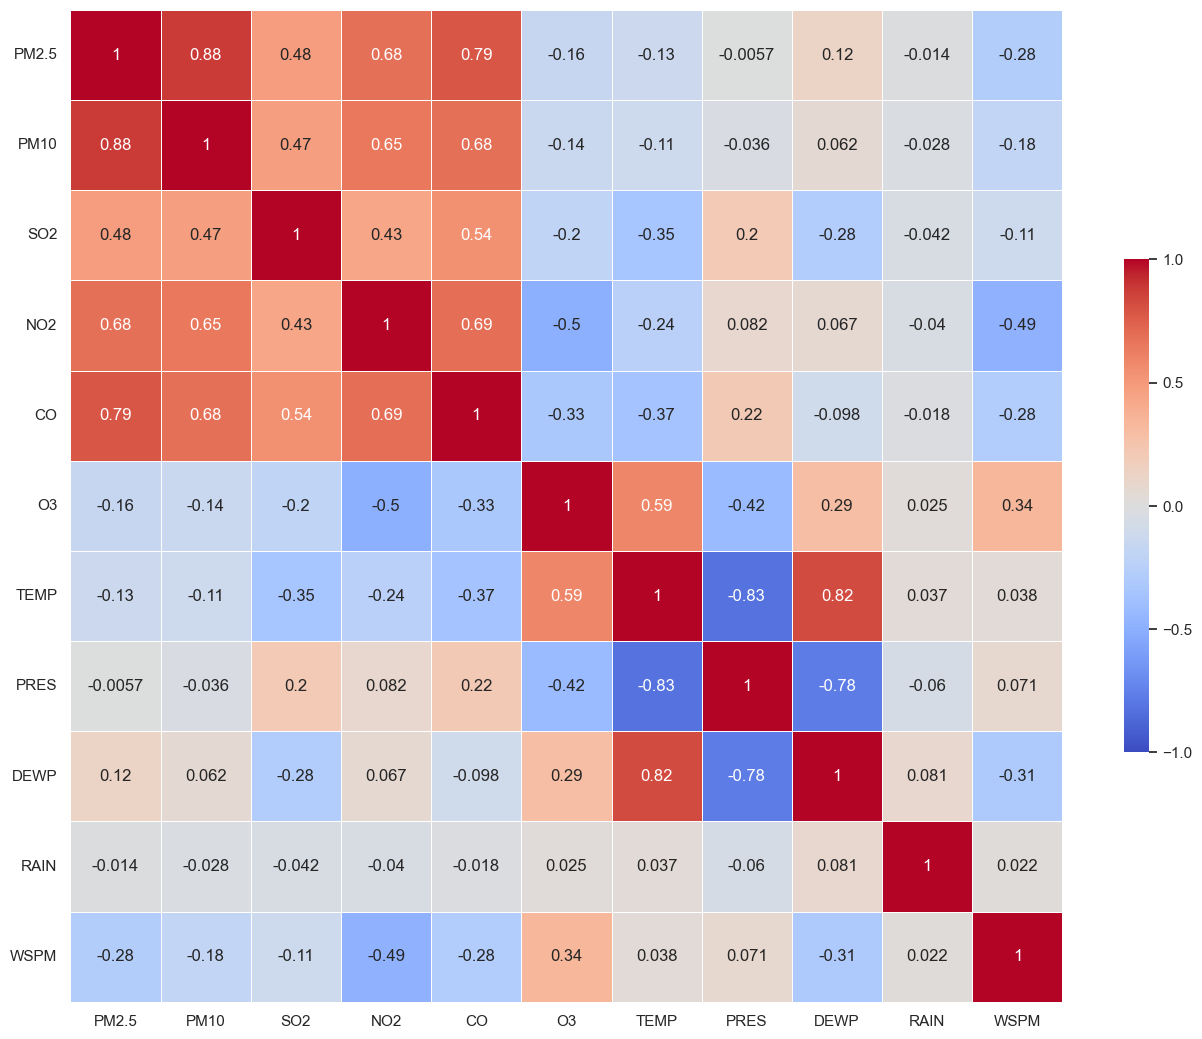

In [20]:
def correlation(df): 
    corr_matrix=df.corr()
    f, ax = plt.subplots(figsize=(16, 16))
    heatmap = sns.heatmap(corr_matrix,
                        #mask = mask,
                        square = True,
                        linewidths = .5,
                        cmap = 'coolwarm',
                        cbar_kws = {'shrink': .4,
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                        vmin = -1,
                        vmax = 1,
                        annot = True,
                        annot_kws = {"size": 12})

    #add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)

    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

correlation(df)

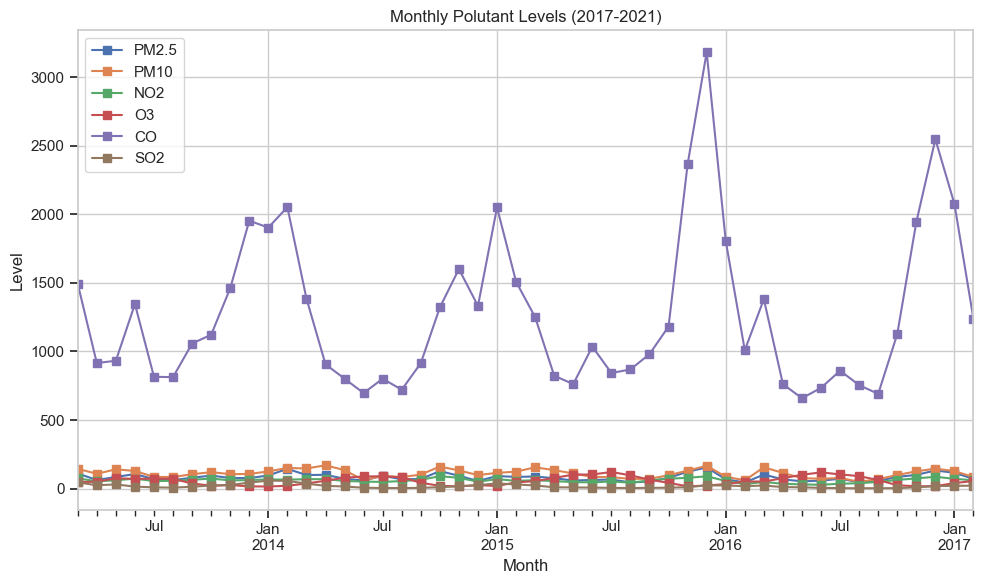

In [21]:
# Resample the data at monthly intervals, taking the mean PM2.5 and PM10 values for each month
monthly_pm25 = df['PM2.5'].resample('M').mean()
monthly_pm10 = df['PM10'].resample('M').mean()
# monthly_NO = df['NO'].resample('M').mean()
monthly_NO2 = df['NO2'].resample('M').mean()
# monthly_NOx = df['NOx'].resample('M').mean()
# monthly_NH3 = df['NH3'].resample('M').mean()
monthly_CO = df['CO'].resample('M').mean()
monthly_SO2 = df['SO2'].resample('M').mean()
monthly_O3 = df['O3'].resample('M').mean()

# Plot both PM2.5 and PM10 values on the same plot
plt.figure(figsize=(10, 6))
monthly_pm25.plot(marker='s', linestyle='-', label='PM2.5')
monthly_pm10.plot(marker='s', linestyle='-', label='PM10')
#monthly_NO.plot(marker='s', linestyle='-', label='NO')
monthly_NO2.plot(marker='s', linestyle='-', label='NO2')
#monthly_NOx.plot(marker='s', linestyle='-', label='NOx')
monthly_O3.plot(marker='s', linestyle='-', label='O3') 
monthly_CO.plot(marker='s', linestyle='-', label='CO')
monthly_SO2.plot(marker='s', linestyle='-', label='SO2')
plt.title('Monthly Polutant Levels (2017-2021)')
plt.xlabel('Month')
plt.ylabel('Level')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

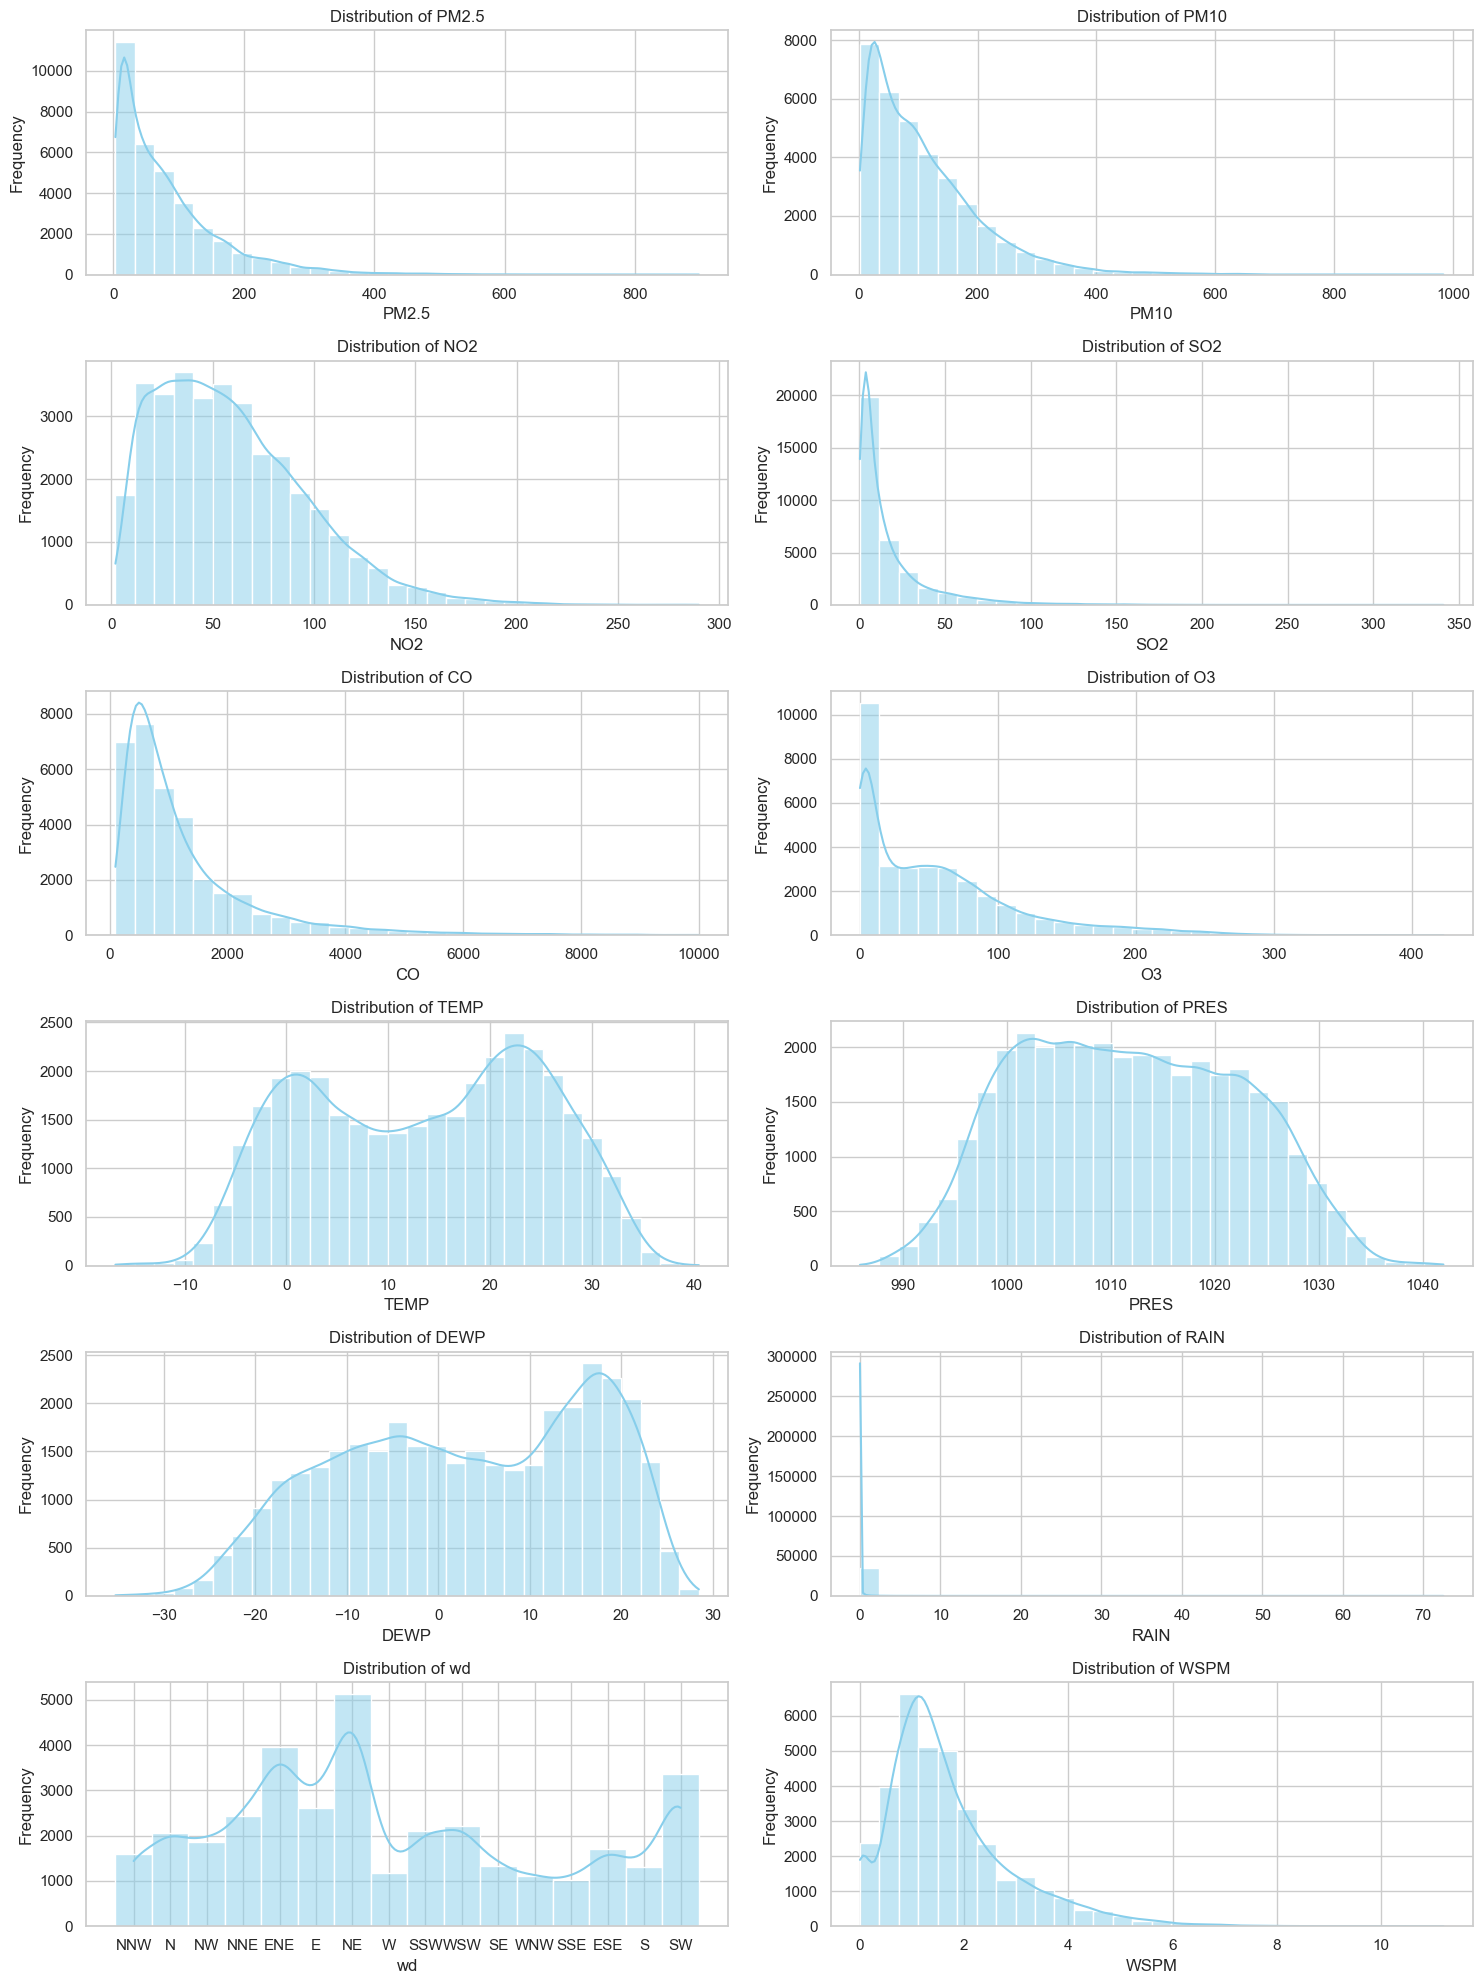

In [22]:
sns.set(style="whitegrid")

# List of variables
variables = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']

# Creating subplots
fig, axes = plt.subplots(6, 2, figsize=(15, 20))

for i, variable in enumerate(variables):
    row = i // 2
    col = i % 2
    sns.histplot(df[variable], bins=30, kde=True, color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {variable}')
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Data Distribution Month Wise

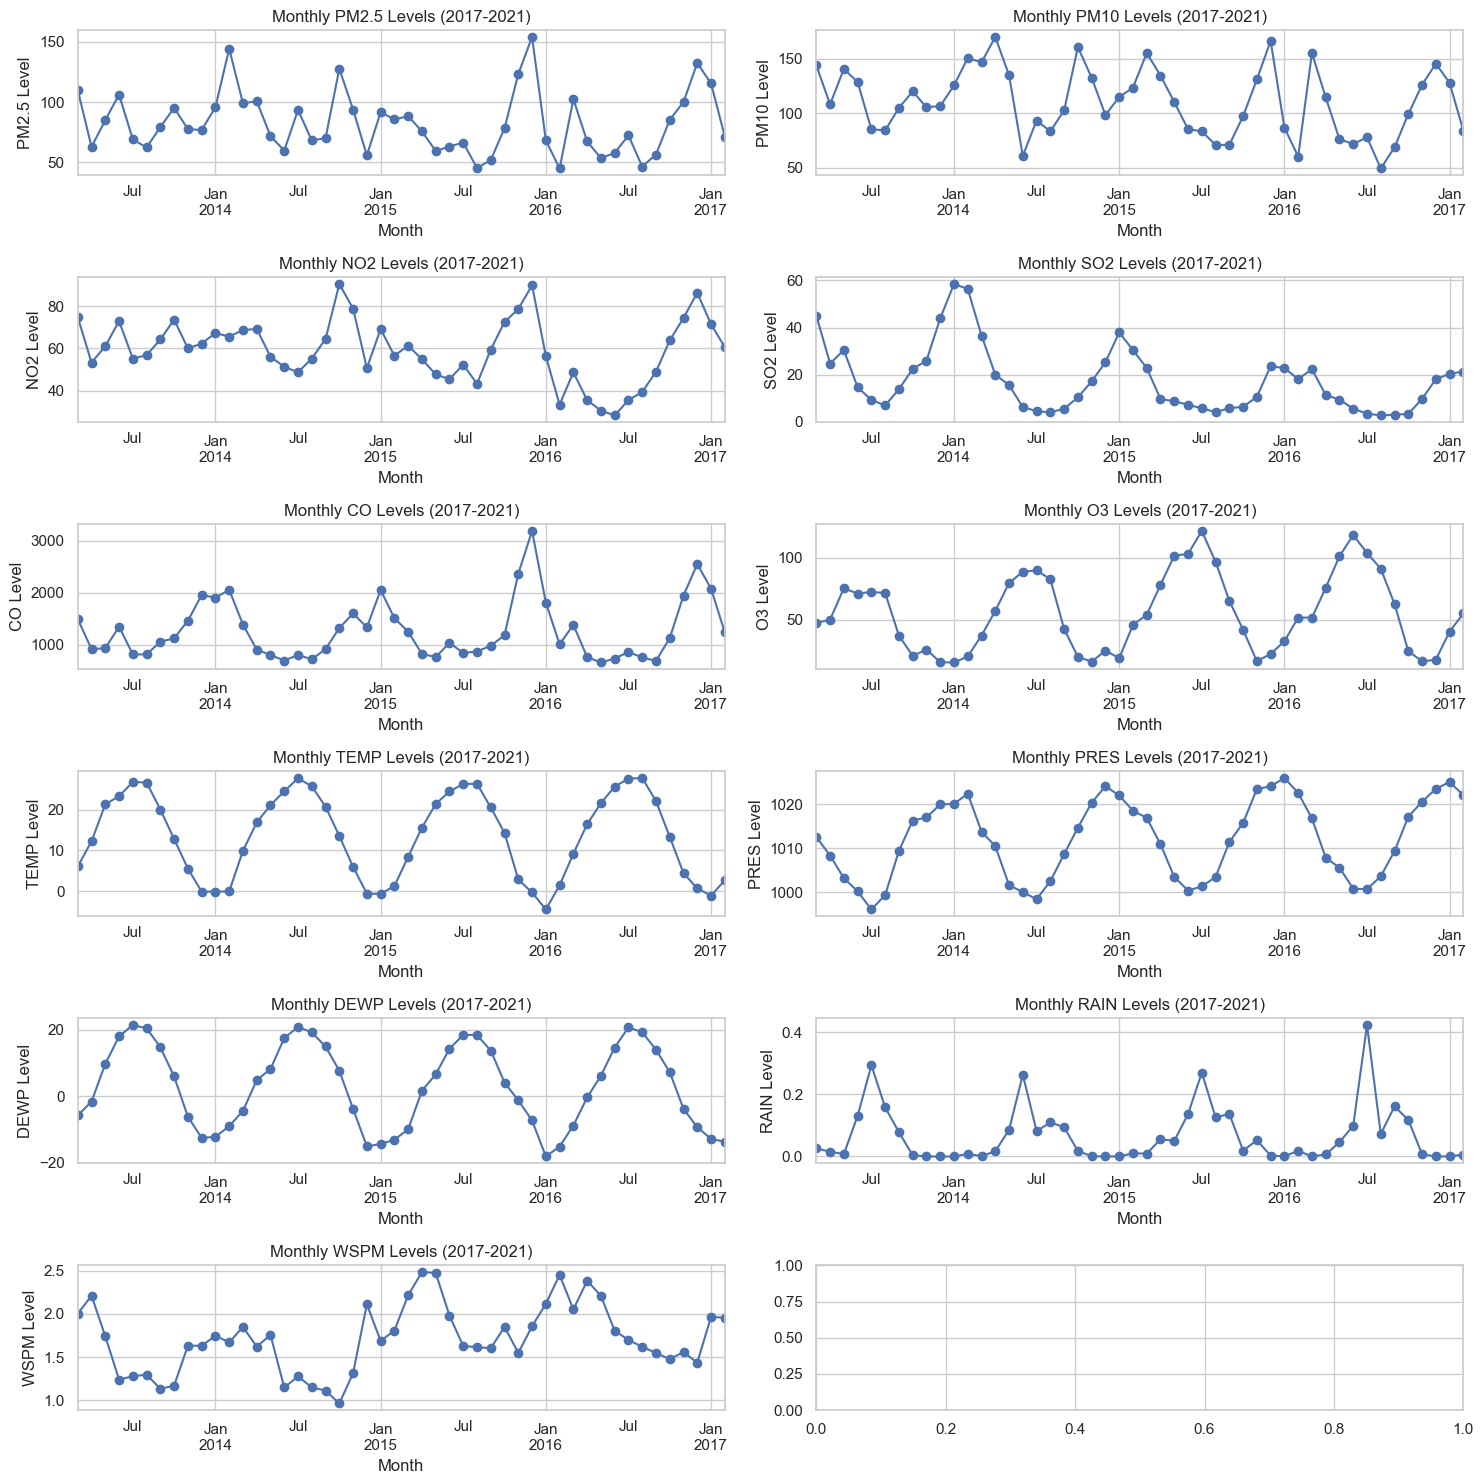

In [23]:
def plot_g(value, df, ax):
    monthly_value = df[value].resample('M').mean()
    # Plot the monthly data
    monthly_value.plot(marker='o', linestyle='-', ax=ax)
    ax.set_title('Monthly ' + value + ' Levels (2017-2021)')
    ax.set_xlabel('Month')
    ax.set_ylabel(value + ' Level')
    ax.grid(True)

# List of variables
variables = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']

# Creating subplots
fig, axes = plt.subplots(6, 2, figsize=(15, 15))

# Plotting each variable
for i, variable in enumerate(variables):
    row = i // 2
    col = i % 2
    plot_g(variable, df, ax=axes[row, col])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Data Distribution Day Wise

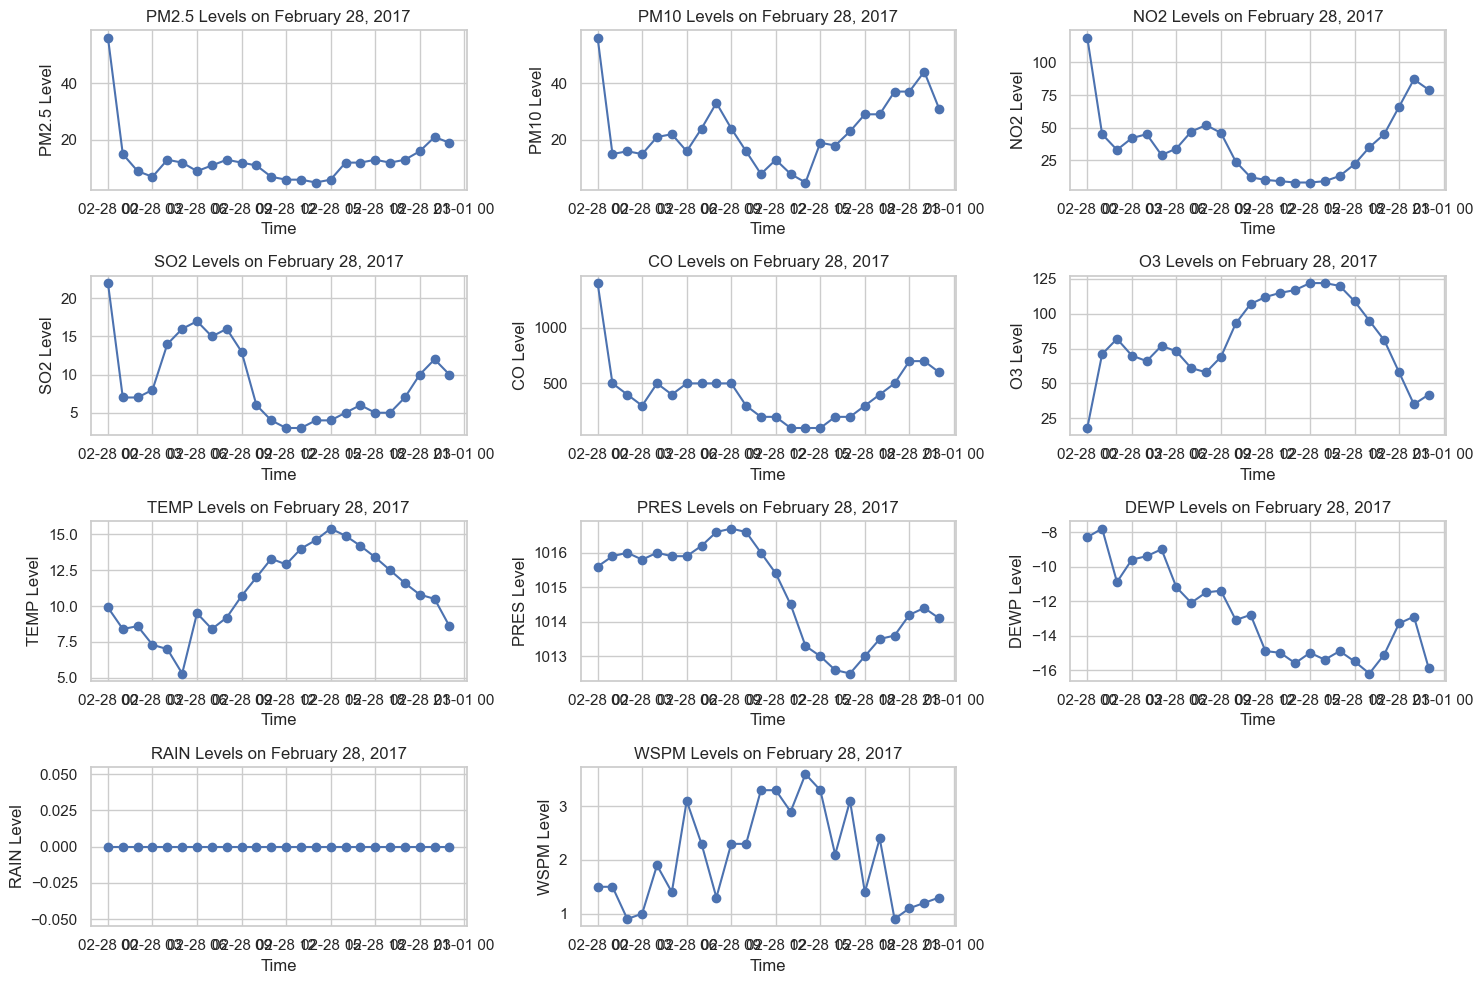

In [24]:
# Filter data for a specific day (e.g., January 1, 2018)
day_data = df.loc['2017-02-28']

# Plot values for all variables for the day
plt.figure(figsize=(15, 10))

variables = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for i, variable in enumerate(variables):
    plt.subplot(4, 3, i+1)
    plt.plot(day_data.index, day_data[variable], marker='o', linestyle='-')
    plt.title(f'{variable} Levels on February 28, 2017')
    plt.xlabel('Time')
    plt.ylabel(f'{variable} Level')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
df['wd'] = pd.factorize(df['wd'], na_sentinel=-1)[0]
# df['wd_encoded'] = df['wd_encoded'].replace(-1, pd.NA)
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15796\1142887324.py:1: FutureWarning: Specifying `na_sentinel=-1` is deprecated, specify `use_na_sentinel=True` instead.
  df['wd'] = pd.factorize(df['wd'], na_sentinel=-1)[0]


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
Datetime,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,0,4.4
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,1,4.7
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,0,5.6
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,2,3.1
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,2,2.4
2017-02-28 20:00:00,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,11,0.9
2017-02-28 21:00:00,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,2,1.1


## Data Preprocessing

### Imputation

#### 1. Mean Imputation

In [26]:
imputer = SimpleImputer(strategy='mean')
df_mean = imputer.fit_transform(df)
df_mean =pd.DataFrame(df_mean, columns=df.columns) 
df_mean.index=df.index

# Specifying the file path where you want to save the CSV file
csv_file_path = './Mean_Impute.csv'

# Writing the DataFrame to a CSV file
df_mean.to_csv(csv_file_path)

df_mean.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,7.025896,1.708496
std,81.045038,94.243001,22.516658,36.570739,1190.100376,56.478782,11.395845,10.401079,13.684991,0.909796,4.471321,1.203831
min,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,-1.000000,0.000000
25%,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.100000,0.000000,4.000000,0.900000
50%,61.000000,89.000000,9.000000,55.000000,900.000000,46.000000,14.500000,1011.400000,3.800000,0.000000,6.000000,1.400000
75%,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,10.000000,2.200000
max,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,15.000000,11.200000


#### 2. Median Imputation

In [27]:
imputer = SimpleImputer(strategy='median')
df_median = imputer.fit_transform(df)
df_median =pd.DataFrame(df_median, columns=df.columns) 
df_median.index=df.index

# Specifying the file path where you want to save the CSV file
csv_file_path = './Median_Impute.csv'

# Writing the DataFrame to a CSV file
df_median.to_csv(csv_file_path)

df_median.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,82.120075,109.588187,17.152554,59.121859,1244.561887,55.649690,13.585130,1011.846665,3.123449,0.067383,7.025896,1.708373
std,81.142233,94.299574,22.557057,36.586135,1192.758674,56.563751,11.395866,10.401084,13.685001,0.909798,4.471321,1.203846
min,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,-1.000000,0.000000
25%,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.100000,0.000000,4.000000,0.900000
50%,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,6.000000,1.400000
75%,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,10.000000,2.200000
max,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,15.000000,11.200000


#### 3. Back Fill Imputation and Forward Fill Imputation

In [28]:
df_bfill=df.fillna(method='bfill')

# Specifying the file path where you want to save the CSV file
csv_file_path = './Back Fill.csv'

# Writing the DataFrame to a CSV file
df_bfill.to_csv(csv_file_path)

df_bfill.describe()

df_ffill=df.fillna(method='ffill')

# Specifying the file path where you want to save the CSV file
csv_file_path = './Forward Fill.csv'

# Writing the DataFrame to a CSV file
df_ffill.to_csv(csv_file_path)

df_ffill.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,83.163652,110.733262,17.573220,59.290826,1267.071954,55.184512,13.581908,1011.851716,3.120283,0.067383,7.025896,1.708470
std,82.290700,95.375762,22.819302,37.007696,1242.121599,57.582259,11.400761,10.404909,13.690615,0.909798,4.471321,1.204171
min,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,-1.000000,0.000000
25%,22.000000,38.000000,3.000000,30.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,4.000000,0.900000
50%,60.000000,88.000000,9.000000,54.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,6.000000,1.400000
75%,114.000000,157.000000,22.000000,81.000000,1600.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,10.000000,2.200000
max,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,15.000000,11.200000


#### 4. ExtraTree Regessor Using Iterative Imputer

In [58]:
# Filling missing values using IterativeImputer
imputer = IterativeImputer(estimator=ExtraTreesRegressor(n_jobs=1), max_iter=7)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Specifying the file path where you want to save the CSV file
csv_file_path = './ET_Regressor.csv'

# Writing the DataFrame to a CSV file
df_imputed.to_csv(csv_file_path, index=False)

# Reading the CSV file and correcting data types
df_et = pd.read_csv(csv_file_path, na_values='None')
df_et['Datetime'] = pd.to_datetime(df_et['Datetime'])
df_et.set_index('Datetime', inplace=True)
df_et

#### 5. PPCA Imputation

In [30]:
# Replace NaN values with the mean for each column
df_filled = df.fillna(df.mean())
# df_filled =df_et

# Perform PPCA
num_latent_variables = 2  # You can adjust this based on your analysis
ppca_model = FactorAnalysis(n_components=num_latent_variables)
df_transformed = ppca_model.fit_transform(df_filled)

# Transform the imputed data back to the original space
df_imputed = pd.DataFrame(np.dot(df_transformed, ppca_model.components_) + ppca_model.mean_, columns=df.columns, index=df.index)

# Display the imputed DataFrame
df_imputed

df_result=df.combine_first(df_imputed)

# Specifying the file path where you want to save the CSV file
csv_file_path = './PCCA_Impute.csv'

# Writing the DataFrame to a CSV file
df_result.to_csv(csv_file_path)

df_result.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064.000000
mean,82.509824,109.866996,17.429875,59.311994,1262.945235,55.867345,13.584353,1011.846950,3.12326,0.067420,7.025896,1.708428
std,81.175828,94.293257,22.545238,36.636534,1190.100376,56.798629,11.395889,10.401083,13.68505,0.909796,4.471321,1.203851
min,3.000000,2.000000,0.285600,2.000000,100.000000,-43.969633,-16.800000,985.900000,-35.30000,0.000000,-1.000000,0.000000
25%,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.10000,0.000000,4.000000,0.900000
50%,60.000000,88.000000,9.000000,55.000000,900.000000,42.000000,14.500000,1011.400000,3.80000,0.000000,6.000000,1.400000
75%,113.000000,153.000000,22.000000,81.000000,1500.000000,81.000000,23.300000,1020.100000,15.60000,0.000000,10.000000,2.200000
max,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.50000,72.500000,15.000000,11.200000


## Data Visualization After Imputation

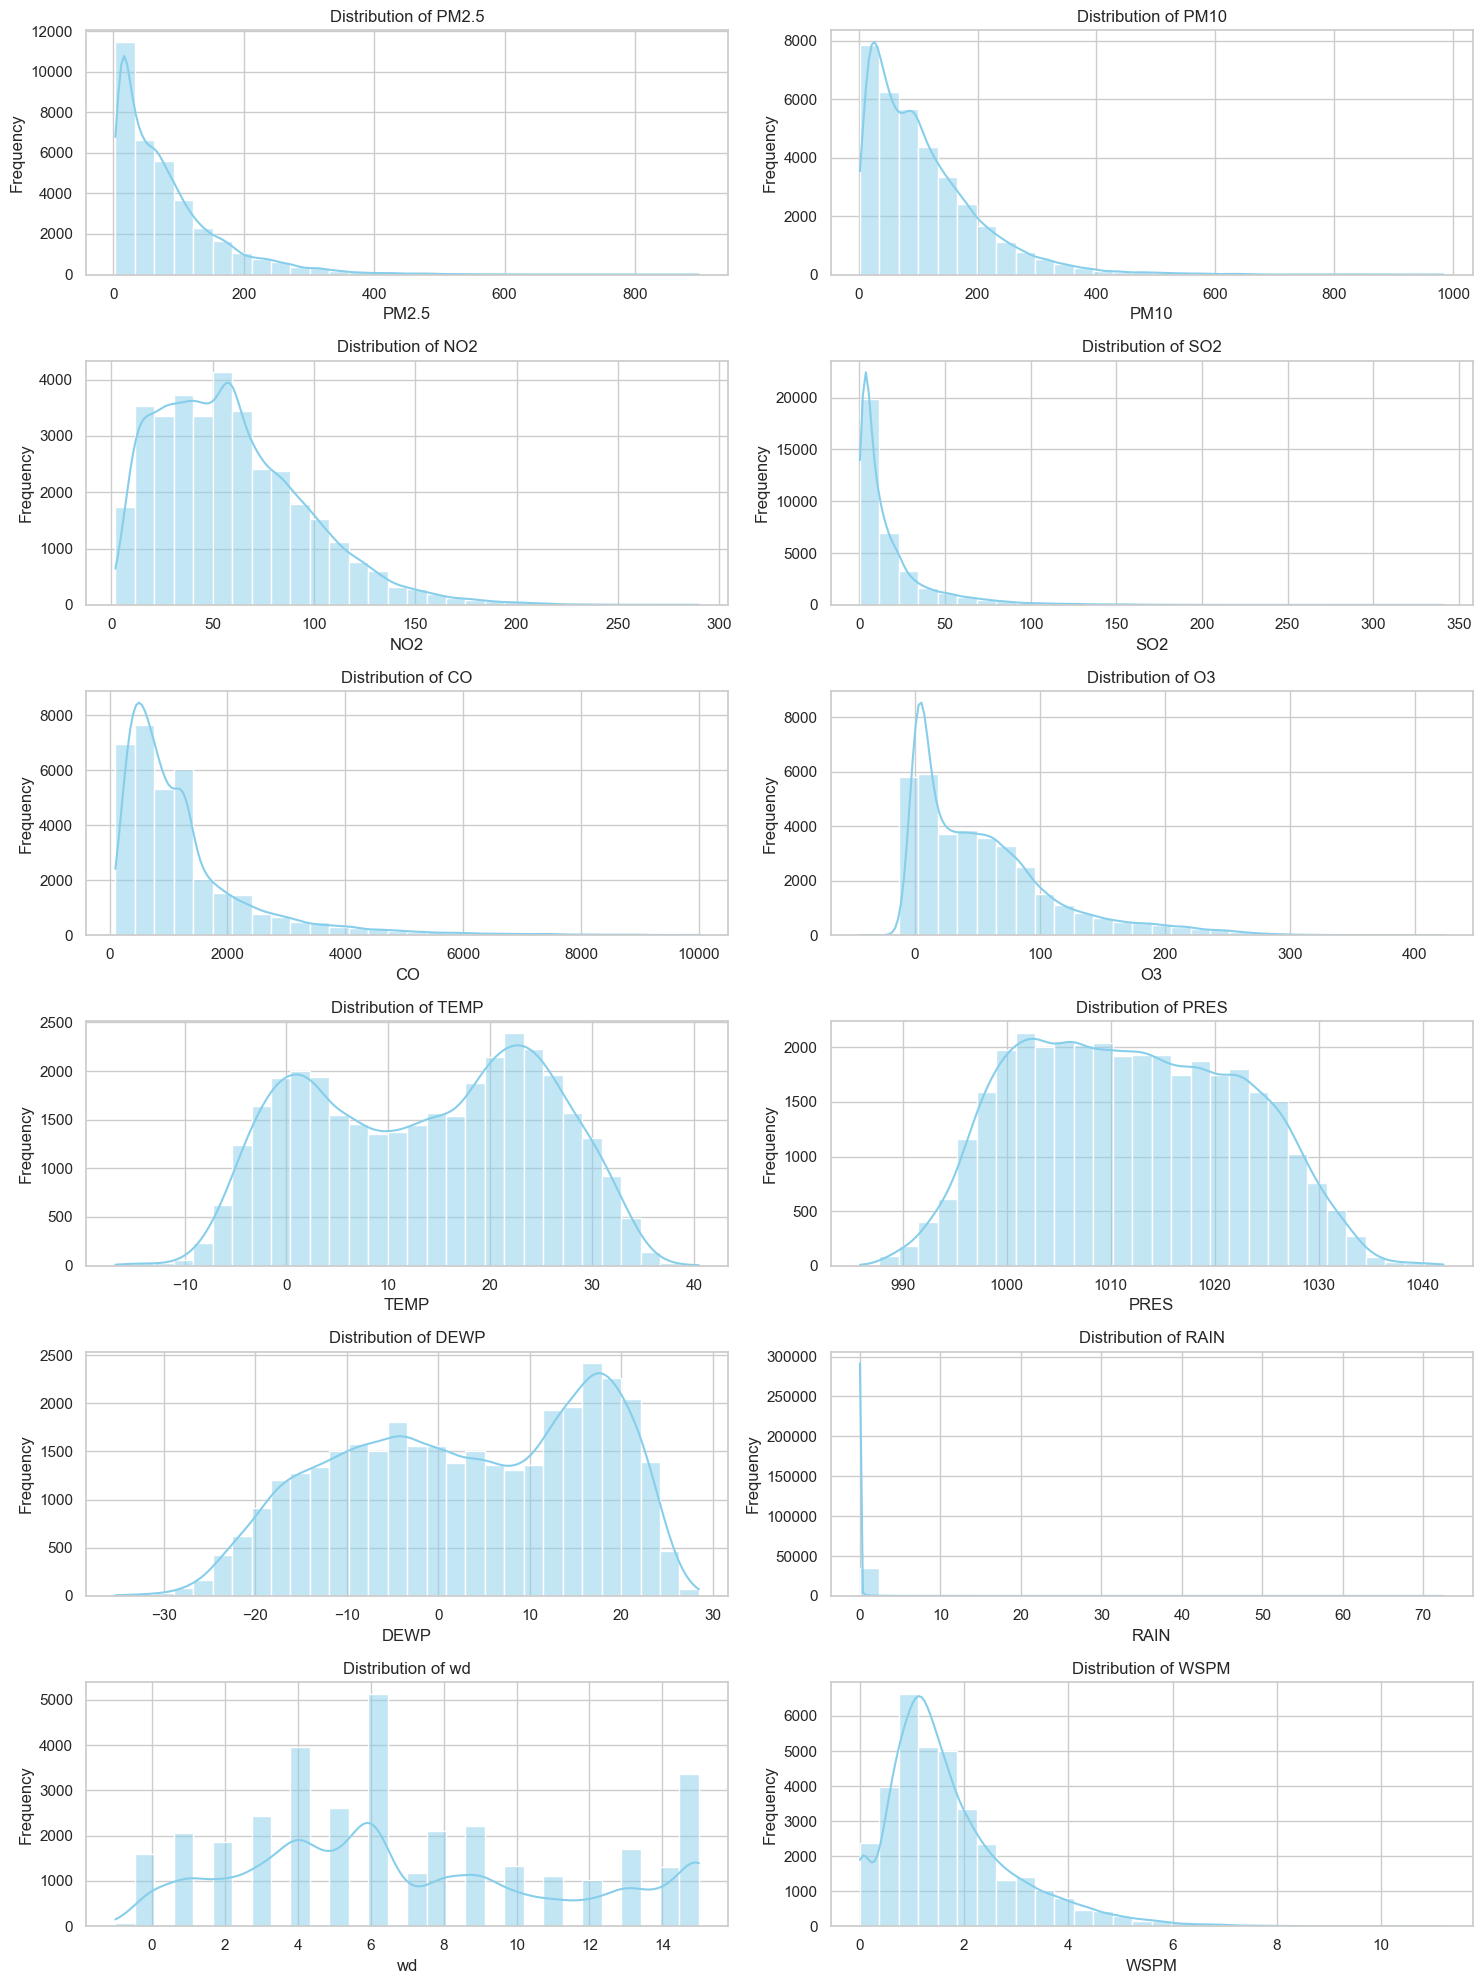

In [31]:
df=df_result

sns.set(style="whitegrid")

# List of variables
variables = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']

# Creating subplots
fig, axes = plt.subplots(6, 2, figsize=(15, 20))

for i, variable in enumerate(variables):
    row = i // 2
    col = i % 2
    sns.histplot(df[variable], bins=30, kde=True, color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {variable}')
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

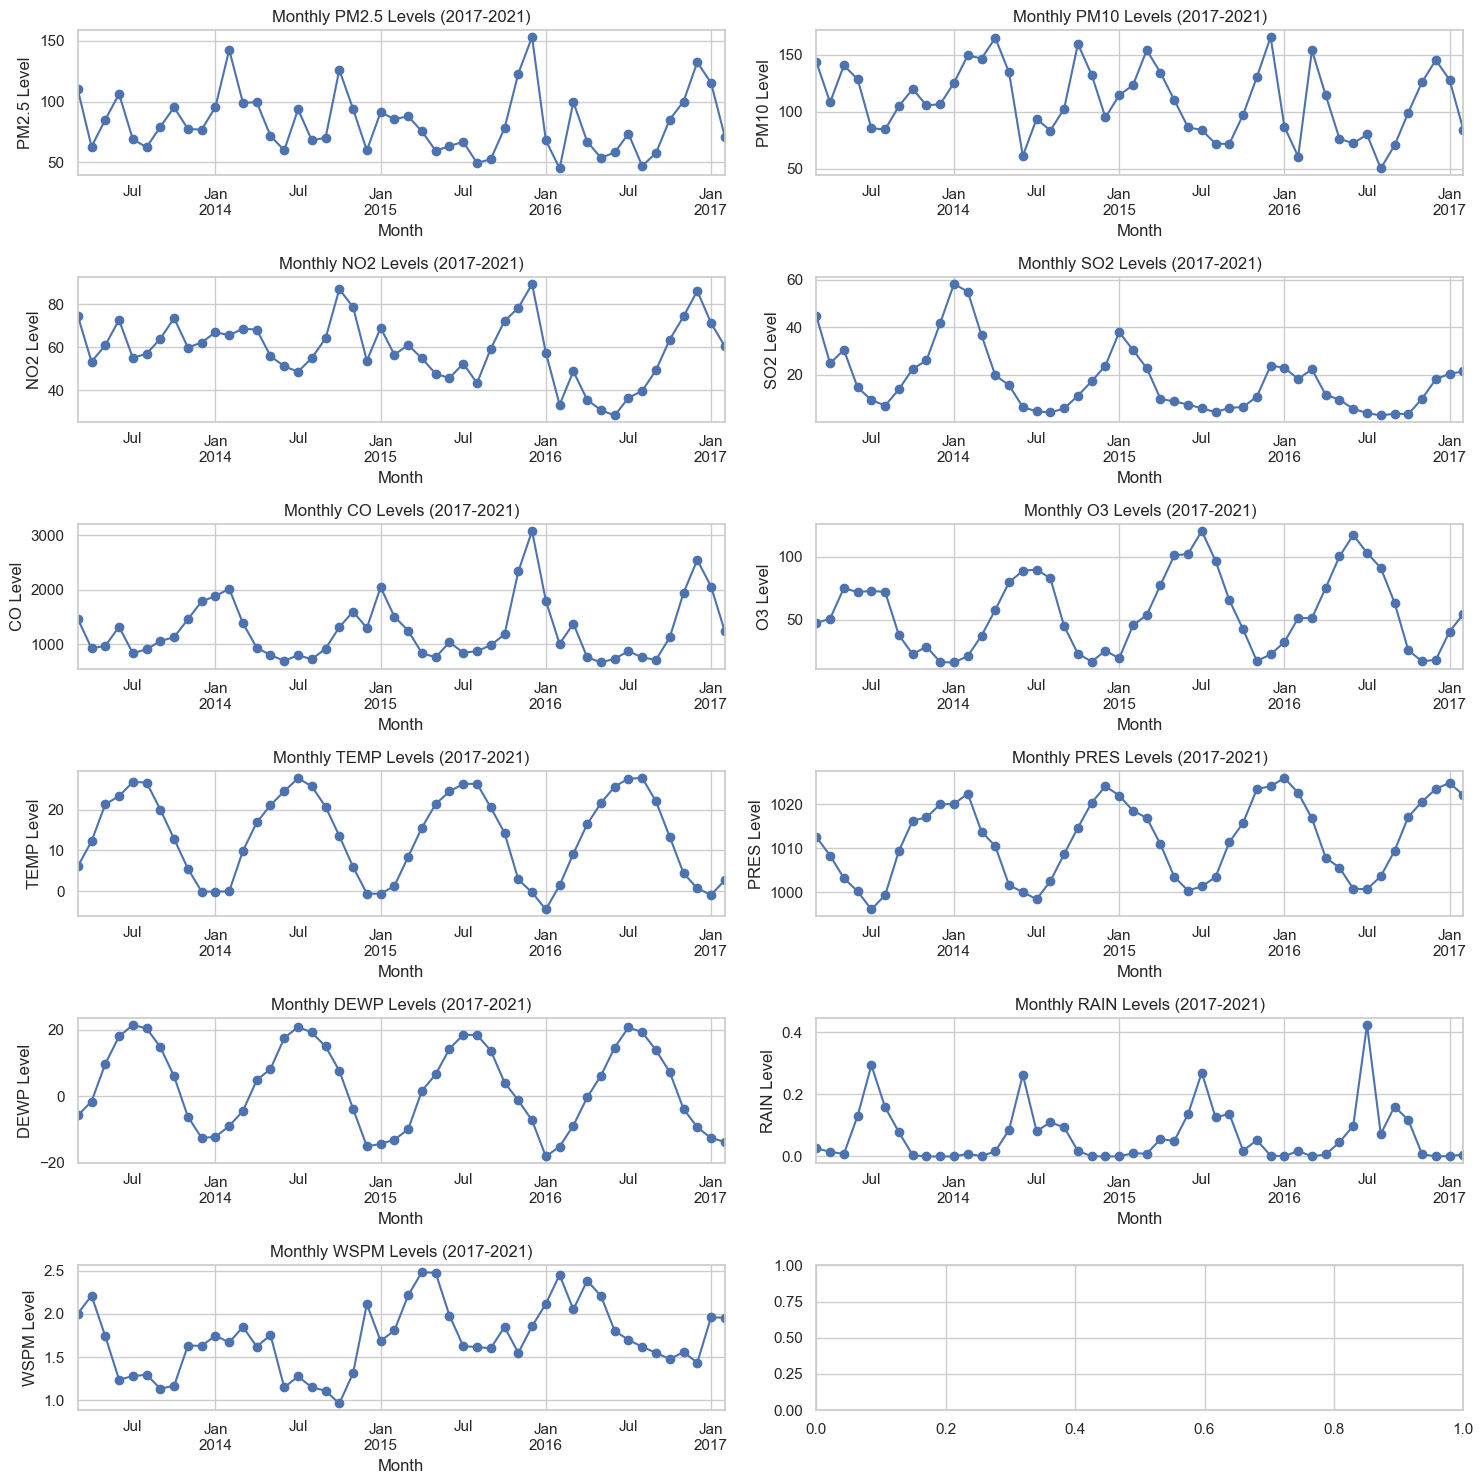

In [32]:
def plot_g(value, df, ax):
    monthly_value = df[value].resample('M').mean()
    # Plot the monthly data
    monthly_value.plot(marker='o', linestyle='-', ax=ax)
    ax.set_title('Monthly ' + value + ' Levels (2017-2021)')
    ax.set_xlabel('Month')
    ax.set_ylabel(value + ' Level')
    ax.grid(True)

# List of variables
variables = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']

# Creating subplots
fig, axes = plt.subplots(6, 2, figsize=(15, 15))

# Plotting each variable
for i, variable in enumerate(variables):
    row = i // 2
    col = i % 2
    plot_g(variable, df, ax=axes[row, col])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

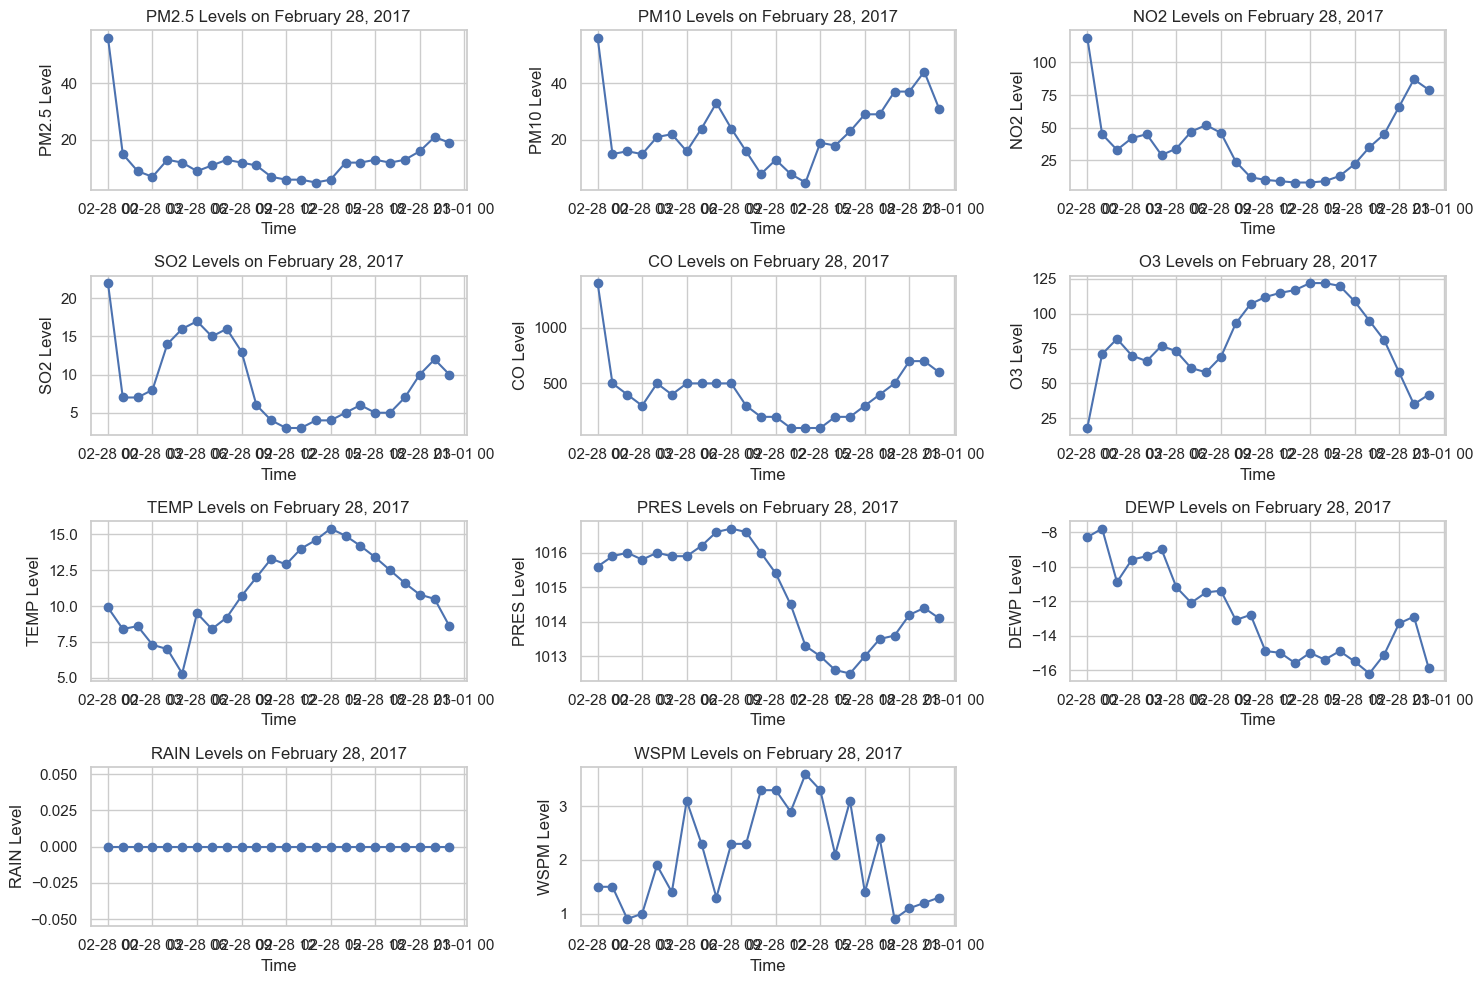

In [33]:
# Filter data for a specific day (e.g., January 1, 2018)
day_data = df.loc['2017-02-28']

# Plot values for all variables for the day
plt.figure(figsize=(15, 10))

variables = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for i, variable in enumerate(variables):
    plt.subplot(4, 3, i+1)
    plt.plot(day_data.index, day_data[variable], marker='o', linestyle='-')
    plt.title(f'{variable} Levels on February 28, 2017')
    plt.xlabel('Time')
    plt.ylabel(f'{variable} Level')
    plt.grid(True)

plt.tight_layout()
plt.show()

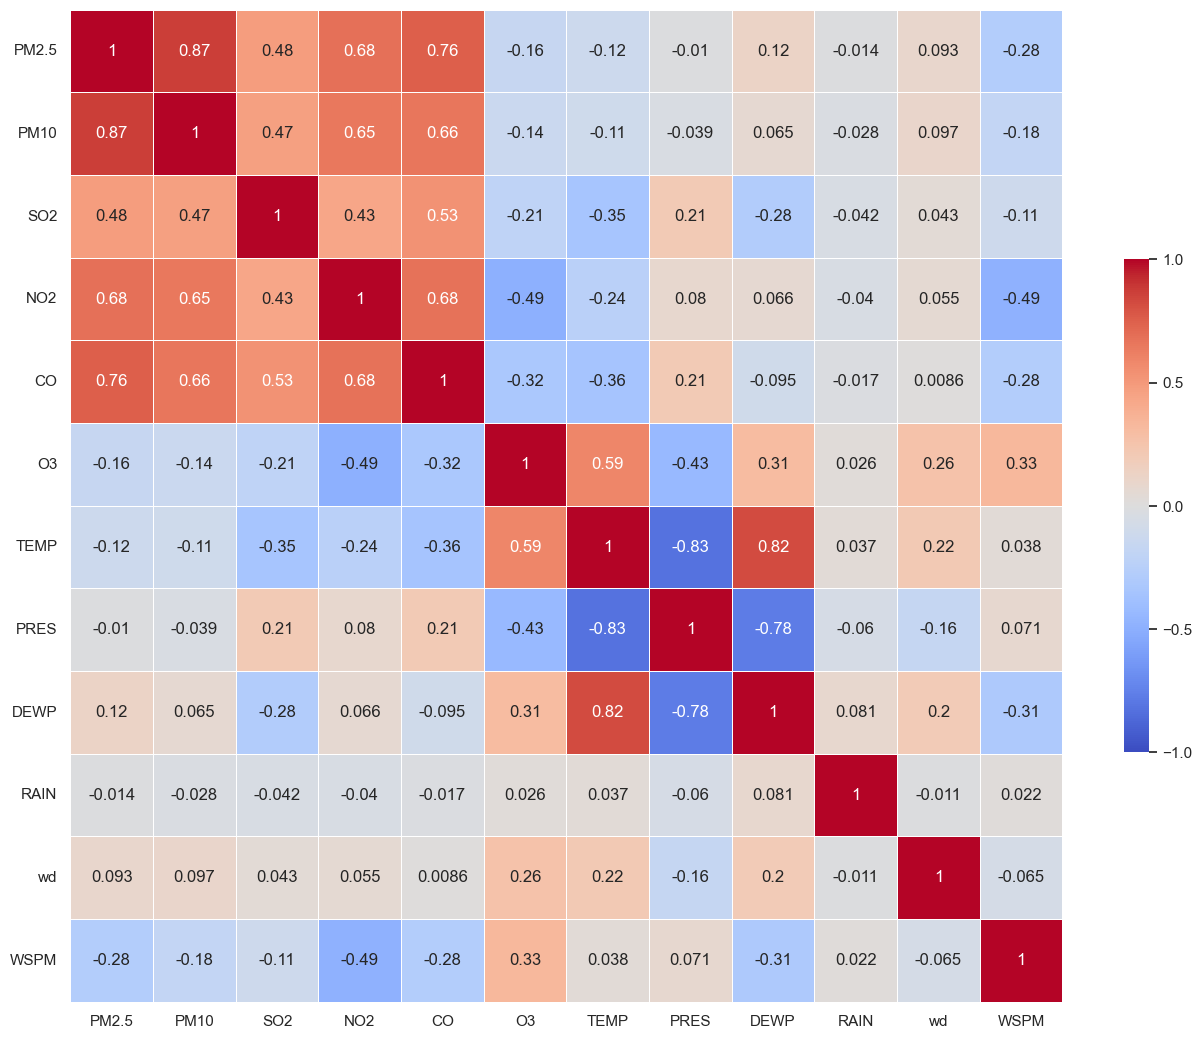

In [34]:
correlation(df)

In [35]:
df['dow']=df.index.day_of_week
df['moy']=df.index.month
df['doty']=df.index.day_of_year
df['hour']=df.index.hour
df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,dow,moy,doty,hour
Datetime,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,0.0,4.4,4,3,60,0
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,1.0,4.7,4,3,60,1
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,0.0,5.6,4,3,60,2
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,2.0,3.1,4,3,60,3
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,1.0,2.0,4,3,60,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,2.0,2.4,1,2,59,19
2017-02-28 20:00:00,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,11.0,0.9,1,2,59,20
2017-02-28 21:00:00,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,2.0,1.1,1,2,59,21


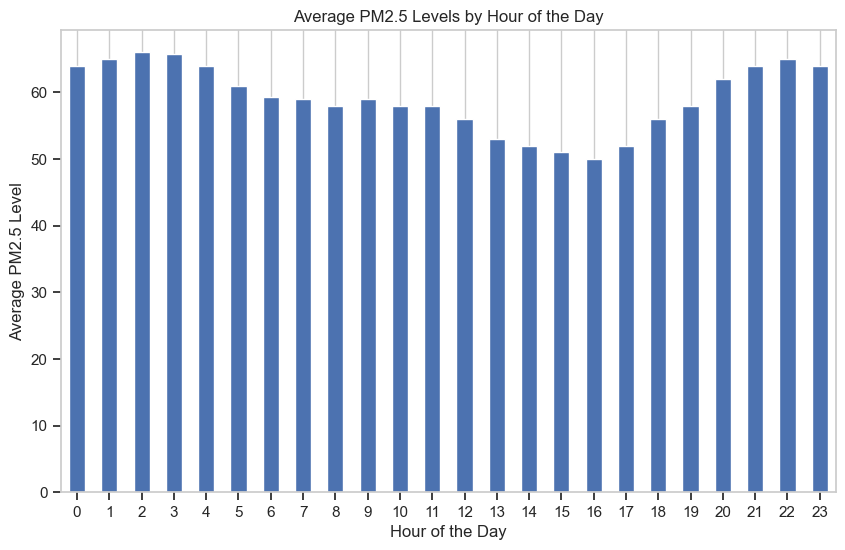

In [36]:
# Group by hour and calculate mean PM2.5 levels
hourly_pm25 = df.groupby('hour')['PM2.5'].median()

# Plot hourly trends
plt.figure(figsize=(10, 6))
hourly_pm25.plot(kind='bar')
plt.title('Average PM2.5 Levels by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average PM2.5 Level')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [39]:
# Define a function to update the plot based on selected date range
def update_plot(start_date, end_date):
    pm25_range = df.loc[start_date:end_date, 'PM2.5']

    fig = make_subplots(rows=1, cols=1)
    fig.add_trace(go.Scatter(x=pm25_range.index, y=pm25_range, mode='lines+markers', name='PM2.5'),
                  row=1, col=1)

    fig.update_layout(title='Seasonality of PM2.5',
                      xaxis_title='Date',
                      yaxis_title='PM2.5 (µg/m³)',
                      showlegend=True)

    fig.show()

# Initialize the plot with the entire dfset
update_plot('2017-02-1', '2017-02-28')